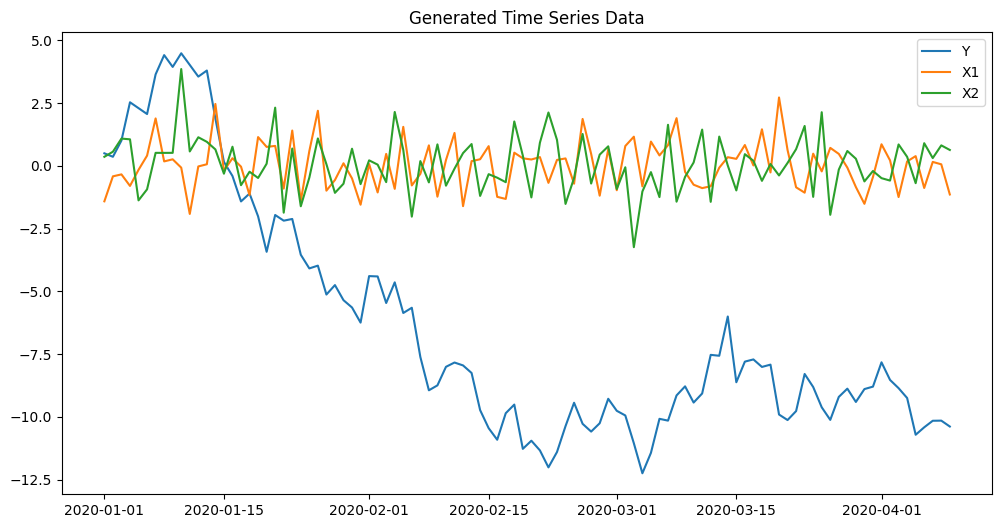

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  100
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -130.335
Date:                Mon, 27 May 2024   AIC                            270.669
Time:                        12:20:34   BIC                            283.645
Sample:                    01-01-2020   HQIC                           275.919
                         - 04-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0031      0.063     -0.048      0.961      -0.128       0.121
x2             0.0838      0.060      1.398      0.162      -0.034       0.201
ar.L1          0.4536      7.447      0.061      0.9

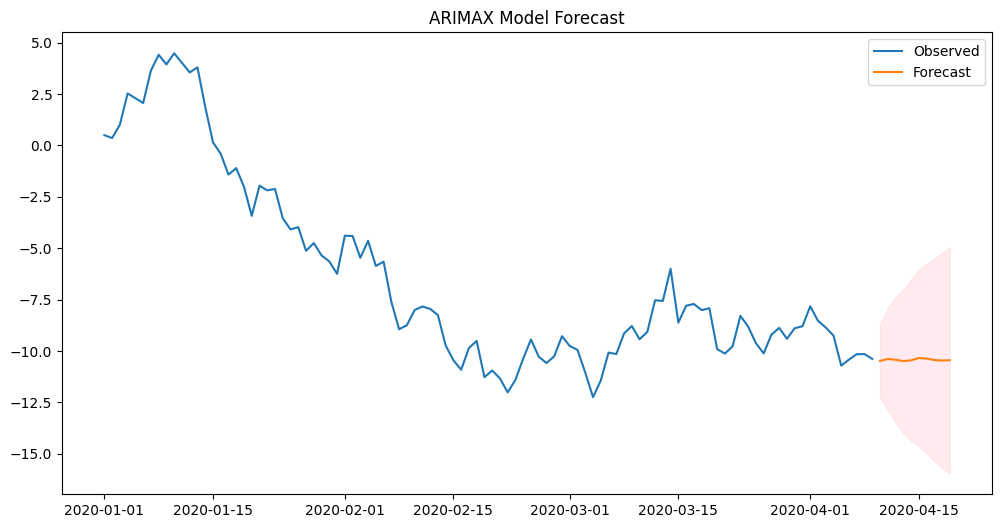

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic time series data
n = 100  # Number of data points
time = np.arange(n)

# Generate the endogenous variable (Y)
Y = np.cumsum(np.random.randn(n))  # Random walk

# Generate exogenous variables (X1, X2)
X1 = np.random.randn(n)
X2 = np.random.randn(n)
exog = np.column_stack([X1, X2])

# Create a DataFrame for better handling
data = pd.DataFrame({'Y': Y, 'X1': X1, 'X2': X2}, index=pd.date_range(start='2020-01-01', periods=n))

# Plot the generated data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Y'], label='Y')
plt.plot(data.index, data['X1'], label='X1')
plt.plot(data.index, data['X2'], label='X2')
plt.legend()
plt.title('Generated Time Series Data')
plt.show()

# Fit ARIMAX model
model = SARIMAX(data['Y'], exog=exog, order=(1, 1, 1))
results = model.fit()

# Print the summary of the model
print(results.summary())

# Forecasting
n_forecast = 10
forecast = results.get_forecast(steps=n_forecast, exog=np.random.randn(n_forecast, 2))
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=n_forecast)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Y'], label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('ARIMAX Model Forecast')
plt.show()
